<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [10]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Import the data

In [11]:
csv_file = 'C:/Users/cdaniels/OneDrive - The University of Waikato/Documents/IOD/Data/ais.csv'
data=pd.read_csv(csv_file,index_col=0)
data.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


### 2. Do some EDA of relationships between features.

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [12]:
# ANSWER
# drop sex and sport columns
X = data.drop(['sex', 'sport'], axis=1)
X.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


In [15]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
rcc,202.0,-3.517538e-16,1.002484,-2.010794,-0.757624,0.079647,0.681607,4.380922
wcc,202.0,4.352954e-16,1.002484,-2.120922,-0.673160,-0.144170,0.649315,4.004225
hc,202.0,7.035077e-17,1.002484,-1.968188,-0.681895,0.111775,0.679660,4.545380
hg,202.0,-3.517538e-16,1.002484,-2.182615,-0.784605,0.098349,0.742169,3.409425
ferr,202.0,-7.035077e-17,1.002484,-1.453591,-0.751870,-0.240089,0.424700,3.316001
bmi,202.0,3.693415e-16,1.002484,-2.172296,-0.655758,-0.082571,0.528245,4.012870
ssf,202.0,7.035077e-17,1.002484,-1.262806,-0.774883,-0.320822,0.656563,4.056633
pcBfat,202.0,-1.407015e-16,1.002484,-1.275803,-0.803699,-0.300823,0.740560,3.565086
lbm,202.0,2.814031e-16,1.002484,-2.340403,-0.782817,-0.141029,0.757511,3.154387
ht,202.0,-7.386830e-16,1.002484,-3.213468,-0.628602,-0.041601,0.625212,3.016985


### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [16]:
# ANSWER
from sklearn.cluster import KMeans

# Create a KMeans instance with 2 clusters: model_2
model_2 = KMeans(n_clusters=2)

# Fit model_2 to the data
model_2.fit(X_scaled)

# Create a KMeans instance with 4 clusters: model_4
model_4 = KMeans(n_clusters=4)

# Fit model_4 to the data
model_4.fit(X_scaled)

C:\Users\cdaniels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cdaniels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

### 5. Get the labels for the models

In [18]:
# ANSWER
labels_2 = model_2.labels_
labels_4 = model_4.labels_

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [19]:
# ANSWER
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

C:\Users\cdaniels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cdaniels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cdaniels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

C:\Users\cdaniels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cdaniels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cdaniels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

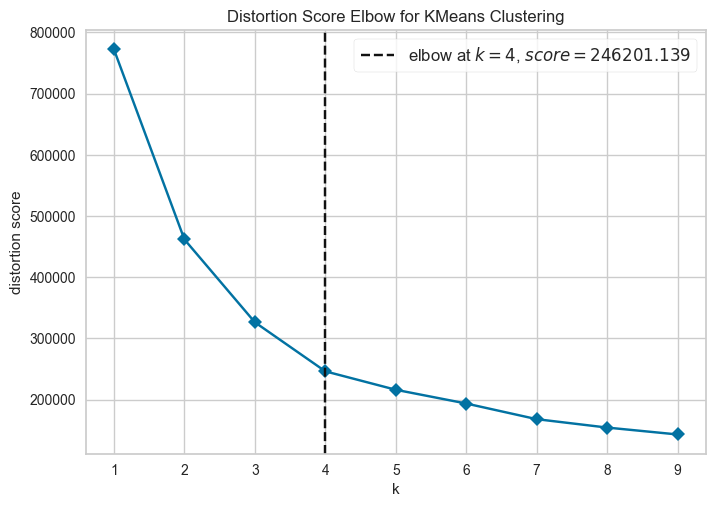

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# ANSWER
from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
visualizer = KElbowVisualizer(kmeans, k=(1,10), timings=False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

<Figure size 1200x600 with 0 Axes>

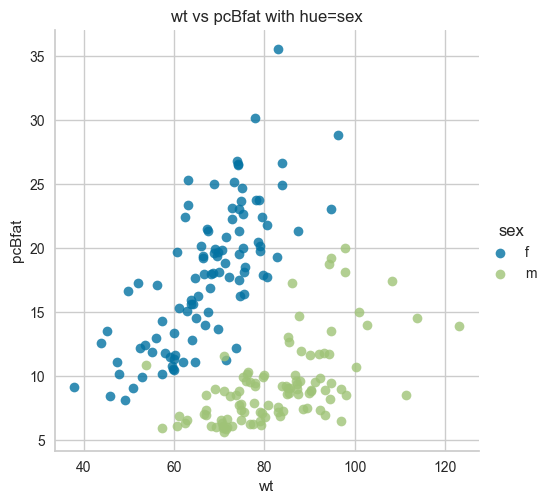

<Figure size 1200x600 with 0 Axes>

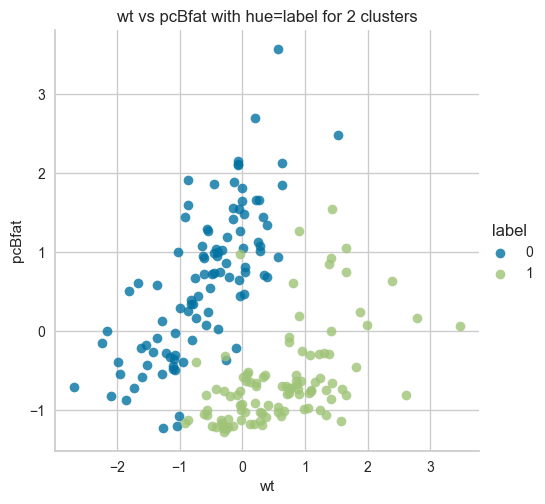

<Figure size 1200x600 with 0 Axes>

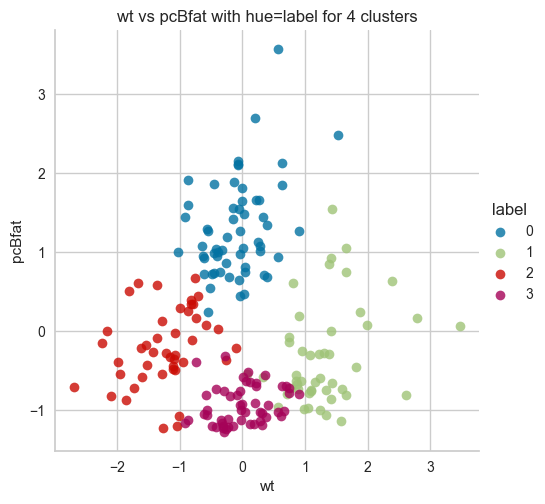

In [25]:
# ANSWER
import seaborn as sns

# Create a DataFrame for the labels from the KMeans model with 2 clusters
df_2 = X_scaled.copy()
df_2['label'] = labels_2

# Create a DataFrame for the labels from the KMeans model with 4 clusters
df_4 = X_scaled.copy()
df_4['label'] = labels_4

# Plot wt vs pcBfat with hue='sex'
plt.figure(figsize=(12, 6))
sns.lmplot(x='wt', y='pcBfat', data=data,hue='sex', fit_reg=False)
plt.title('wt vs pcBfat with hue=sex')

# Plot wt vs pcBfat with hue='label' for the KMeans model with 2 clusters
plt.figure(figsize=(12, 6))
sns.lmplot(x='wt', y='pcBfat', data=df_2, hue='label', fit_reg=False)
plt.title('wt vs pcBfat with hue=label for 2 clusters')

# Plot wt vs pcBfat with hue='label' for the KMeans model with 4 clusters
plt.figure(figsize=(12, 6))
sns.lmplot(x='wt', y='pcBfat', data=df_4, hue='label', fit_reg=False)
plt.title('wt vs pcBfat with hue=label for 4 clusters')

plt.show()




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



